In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
def generarPuntosMuestra(numeroMuestras, listaCoeficientesHiperplano, minimoValorCoordenadasPuntos, maximoValorCoordenadasPuntos, numeroDimensiones, margenMaximoError = 5.0):
    listaPuntosMuestra = []
    listaAbscisasPuntosMuestra = []
    
    #Se generan los puntos (Se tiene como restriccion que las coordenadas de abscisas del punto no se repitan)
    for indice in range(numeroMuestras):
        puntoMuestraValido = False
        while puntoMuestraValido == False:
            abscisasPuntoGenerado = list(np.random.uniform(low = minimoValorCoordenadasPuntos, high = maximoValorCoordenadasPuntos, size = numeroDimensiones - 1))
            if abscisasPuntoGenerado not in listaAbscisasPuntosMuestra:
                listaAbscisasPuntosMuestra.append(abscisasPuntoGenerado)
                valorPunto = np.dot(listaCoeficientesHiperplano[0:(numeroDimensiones - 1)], abscisasPuntoGenerado) + listaCoeficientesHiperplano[numeroDimensiones - 1] + np.random.uniform(low = -margenMaximoError, high = margenMaximoError, size = 1)
                puntoGenerado = abscisasPuntoGenerado + [valorPunto]
                listaPuntosMuestra.append(puntoGenerado)
                puntoMuestraValido = True
    return listaPuntosMuestra

def obtenerListasCoordenadasRespectivas(listaPuntos, numeroDimensiones):
    diccionarioPuntosPorCoordenadas = {}
    for indice in range(numeroDimensiones):
        diccionarioPuntosPorCoordenadas[indice] = []
        
    for puntoActual in listaPuntos:
        for indice in range(numeroDimensiones):
            coordenadaActual = puntoActual[indice]
            diccionarioPuntosPorCoordenadas[indice].append(coordenadaActual)
    return diccionarioPuntosPorCoordenadas

In [3]:
#Parametros de ejecucion del programa
tasaAprendizaje = 0.001
numeroDimensiones = 3
minimoValorCoordenadasPuntos = -20.0
maximoValorCoordenadasPuntos = 20.0
listaCoeficientesHiperplanoBase = [1.0] * numeroDimensiones
margenMaximoError = 3.5
numeroMuestras = 100
tiempoPausaAnimacion = 0.01

In [4]:
listaPuntosMuestra = generarPuntosMuestra(numeroMuestras, listaCoeficientesHiperplanoBase, minimoValorCoordenadasPuntos, maximoValorCoordenadasPuntos, numeroDimensiones, margenMaximoError = margenMaximoError)

In [5]:
#Este bloque de codigo se puede comentar para que el hiperplano propuesto inicialmente este cerca del hiperplano de minimo error que estima un modelo matematico lineal de los puntos y por lo tanto se ejecuta el algoritmo Adaline con pocas iteraciones
listaCoeficientesHiperplanoBase = list(np.random.uniform(low = -15.0, high = 15.0, size = numeroDimensiones))

/tmp/ipykernel_10383/1797765593.py:35: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = currentFigure.gca(projection = '3d')


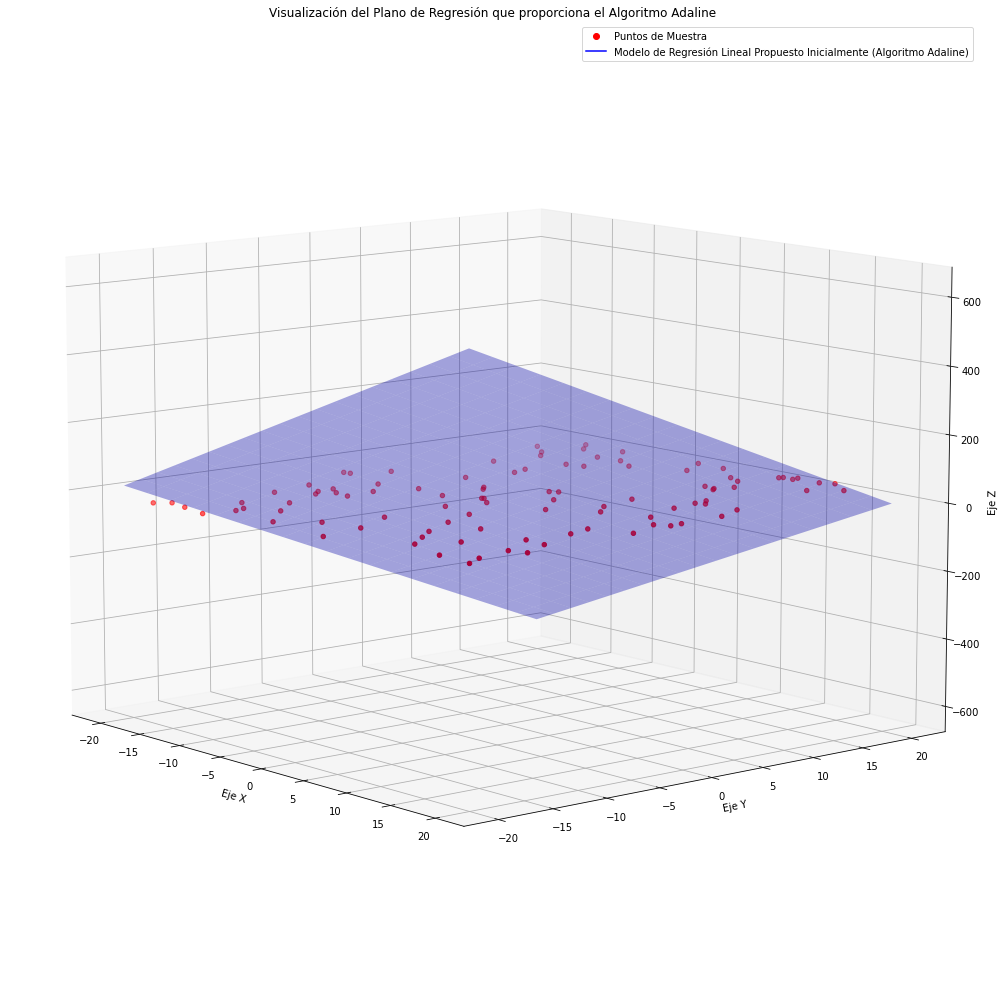

In [6]:
listaPuntosPorCoordenadasRespectivas = obtenerListasCoordenadasRespectivas(listaPuntosMuestra, numeroDimensiones)
valoresCoordenadasXPuntosMuestra = listaPuntosPorCoordenadasRespectivas[0]
valoresCoordenadasYPuntosMuestra = listaPuntosPorCoordenadasRespectivas[1]
valoresCoordenadasZPuntosMuestra = None
minimoEjeX = np.min(valoresCoordenadasXPuntosMuestra) - 1
maximoEjeX = np.max(valoresCoordenadasXPuntosMuestra) + 1
minimoEjeY = None
maximoEjeY = None

numeroMuestrasHiperplanoRegresion = 20
if numeroDimensiones == 2:
    listaValoresCoordenadaXHiperplanoBase = np.linspace(minimoEjeX, maximoEjeX, num = numeroMuestrasHiperplanoRegresion)
    listaValoresCoordenadaYHiperplanoBase = [listaCoeficientesHiperplanoBase[0] * valorX + listaCoeficientesHiperplanoBase[1] for valorX in listaValoresCoordenadaXHiperplanoBase]

    plt.figure(num = 1, figsize = (15, 14))
    plt.plot(valoresCoordenadasXPuntosMuestra, valoresCoordenadasYPuntosMuestra, 'ro', label = "Puntos de Muestra")
    plt.plot(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase, 'b-', label = "Modelo de Regresión Lineal Propuesto Inicialmente (Algoritmo Adaline)")
    plt.legend(loc = 'upper left')
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    plt.title("Visualización de la Recta de Regresión que proporciona el Algoritmo Adaline")
    plt.grid(True)
    plt.show()
elif numeroDimensiones == 3:
    valoresCoordenadasZPuntosMuestra = listaPuntosPorCoordenadasRespectivas[2]
    minimoEjeY = np.min(valoresCoordenadasYPuntosMuestra) - 1
    maximoEjeY = np.max(valoresCoordenadasYPuntosMuestra) + 1

    listaValoresCoordenadaXHiperplanoBase = np.linspace(minimoEjeX, maximoEjeX, num = numeroMuestrasHiperplanoRegresion)
    listaValoresCoordenadaYHiperplanoBase = np.linspace(minimoEjeY, maximoEjeY, num = numeroMuestrasHiperplanoRegresion)
    listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase = np.meshgrid(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase)
    listaValoresCoordenadaZHiperplanoBase = listaCoeficientesHiperplanoBase[0] * listaValoresCoordenadaXHiperplanoBase + listaCoeficientesHiperplanoBase[1] * listaValoresCoordenadaYHiperplanoBase + listaCoeficientesHiperplanoBase[2]
    
    currentFigure = plt.figure(num = 1, figsize = (15, 14))
    ax = currentFigure.gca(projection = '3d')
    ax.view_init(elev = 10, azim = -40)
    ax.scatter(valoresCoordenadasXPuntosMuestra, valoresCoordenadasYPuntosMuestra, valoresCoordenadasZPuntosMuestra, c = 'r', marker = 'o')
    etiquetaLeyendaPuntosMuestra = mpl.lines.Line2D([0], [0], linestyle = "none", c = 'r', marker = 'o')
    ax.plot_surface(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase, listaValoresCoordenadaZHiperplanoBase, color = 'b', alpha = 0.35)
    etiquetaLeyendaPlano = mpl.lines.Line2D([0], [0], linestyle = "-", c = 'b')
    ax.set_xlabel("Eje X")
    ax.set_ylabel("Eje Y")
    ax.set_zlabel("Eje Z")
    ax.set_title("Visualización del Plano de Regresión que proporciona el Algoritmo Adaline")
    ax.legend([etiquetaLeyendaPuntosMuestra, etiquetaLeyendaPlano], ["Puntos de Muestra", "Modelo de Regresión Lineal Propuesto Inicialmente (Algoritmo Adaline)"], numpoints = 1)
    plt.tight_layout()
    plt.show()

In [7]:
"""

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib

tiempoPausa = 0.1

minimoEjeX = -1
maximoEjeX = 5
minimoEjeY = -1
maximoEjeY = 5
minimoEjeZ = -1
maximoEjeZ = 11

def generarMuestra(numeroAbscisas1, numeroAbscisas2, pendiente1, pendiente2, intercepto):
    muestra = []
    i = 0
    for x in range(numeroAbscisas1):
        for y in range(numeroAbscisas2):
            epsilon = np.random.rand() % 1
            if i % 2 == 0:
                muestra.append([x, y, x * pendiente1 + y * pendiente2 + intercepto + epsilon])
            else:
                muestra.append([x, y, x * pendiente1 + y * pendiente2 + intercepto - epsilon])
            i += 1
    return muestra

def calcularErrorTotalMinimo(muestra, pendiente1, pendiente2, intercepto):
    errorTotal = 0
    for punto in muestra:
        errorTotal += abs(punto[2] - (punto[0] * pendiente1 + punto[1] * pendiente2 + intercepto))
    return errorTotal / len(muestra)

pendiente1 = 1
pendiente2 = 1
intercepto = 0
muestra = generarMuestra(maximoEjeX, maximoEjeY, pendiente1, pendiente2, intercepto)
           
def separarPuntosPorListasDeCoordenadas(muestra):
    x = []
    y = []
    z = []
    for punto in muestra:
        x.append(punto[0])
        y.append(punto[1])
        z.append(punto[2])
    return x, y, z

def planoRegresion(x, y, w1, w2, b):
    valoresEnElPlano = []
    for indice in range(len(x)):
        valoresEnElPlano.append(w1 * x[indice] + w2 * y[indice] + b)
    return valoresEnElPlano

fig = plt.figure()
ax = fig.gca(projection = '3d')

def algoritmoAdaline(muestra, tasaAprendizaje):
    #Calculo del error minimo y un sesgo como margen de error
    errorMinimo = calcularErrorTotalMinimo(muestra, pendiente1, pendiente2, intercepto)
    epsilonError = 0.05
    print("Error minimo = " + str(errorMinimo))
    print("Margen de error = " + str(epsilonError))
    print("Error objetivo = " + str(errorMinimo + epsilonError))
    #Desarrollo del algoritmo Adaline (Pesos aleatorios entre -5 y 5)
    w1 = np.random.rand() % 10 - 5
    w2 = np.random.rand() % 10 - 5
    b = np.random.rand() % 10 - 5
    numeroPasos = 1
    plt.ion()
    plt.show()
    while True:
        ax.cla()
        errorTotal = 0
        for punto in muestra:
            v = w1 * punto[0] + w2 * punto[1] + b
            error = punto[2] - v
            errorTotal += abs(error)
            b = b + tasaAprendizaje * error
            w1 = w1 + tasaAprendizaje * error * punto[0]
            w2 = w2 + tasaAprendizaje * error * punto[1]
        errorTotal = errorTotal / len(muestra)
        print("Error en la iteracion " + str(numeroPasos) + " = " + str(errorTotal))
        x, y, z = separarPuntosPorListasDeCoordenadas(muestra)
        #Ilustracion de los puntos de muestra
        ax.plot(np.array(x), np.array(y), np.array(z), 'b.')
        #Puntos demas para mostrar mejor el plano de regresion
        x.append(minimoEjeX)
        x.append(maximoEjeX)
        y.append(minimoEjeY)
        y.append(maximoEjeY)
        x.append(minimoEjeX)
        x.append(maximoEjeX)
        y.append(maximoEjeY)
        y.append(minimoEjeY)
        # Ilustracion del plano de regresion
        ax.plot_trisurf(x, y, np.array(planoRegresion(x, y, w1, w2, b)), color = 'r', alpha = 0.25)
        ax.set_xlabel('Eje X')
        ax.set_ylabel('Eje Y')
        ax.set_zlabel('Eje Z')
        ax.set_xlim(minimoEjeX, maximoEjeX)
        ax.set_ylim(minimoEjeY, maximoEjeY)
        ax.set_zlim(minimoEjeZ, maximoEjeZ)
        ax.set_title('Visualizacion del plano que proporciona el algoritmo')
        plt.pause(tiempoPausa)
        if errorTotal <= errorMinimo + epsilonError:
            print("Fue(ron) necesario(s)", numeroPasos, "paso(s) para obtener un plano de regresion")
            print("El plano de regresion que proporciona el algoritmo es z = " + str(w1) + "x + " + str(w2) + "y + " + str(b))
            break
        numeroPasos += 1
    plt.ioff()
    plt.show()

algoritmoAdaline(muestra, 0.01)

"""

'\n\nfrom mpl_toolkits.mplot3d import Axes3D\nimport numpy as np\nimport matplotlib.pyplot as plt\n%matplotlib\n\ntiempoPausa = 0.1\n\nminimoEjeX = -1\nmaximoEjeX = 5\nminimoEjeY = -1\nmaximoEjeY = 5\nminimoEjeZ = -1\nmaximoEjeZ = 11\n\ndef generarMuestra(numeroAbscisas1, numeroAbscisas2, pendiente1, pendiente2, intercepto):\n    muestra = []\n    i = 0\n    for x in range(numeroAbscisas1):\n        for y in range(numeroAbscisas2):\n            epsilon = np.random.rand() % 1\n            if i % 2 == 0:\n                muestra.append([x, y, x * pendiente1 + y * pendiente2 + intercepto + epsilon])\n            else:\n                muestra.append([x, y, x * pendiente1 + y * pendiente2 + intercepto - epsilon])\n            i += 1\n    return muestra\n\ndef calcularErrorTotalMinimo(muestra, pendiente1, pendiente2, intercepto):\n    errorTotal = 0\n    for punto in muestra:\n        errorTotal += abs(punto[2] - (punto[0] * pendiente1 + punto[1] * pendiente2 + intercepto))\n    return erro